# Post Analysis of Rx and Rzz investigation data

Worksheet loads in the data for the Rx or Rzz investigation (error rate vs rotation angle), applies a first term Fourier series model to them of the form Error = B0 + B1sin(angle) + B2cos(angle) using regression, then plots the collected data along with the fitted model. 

Also provided in the plots are the parameters of the model and its F-value.

In [ ]:
import pandas as pd
import numpy as np

from functions.plotting import single_plot, multi_subplot
from functions.data_fetching import load_batch_jobs, load_single_jobs

## General Functions

In [50]:
def get_angle_mean_std(data_df):
    """get means and std for each rotation angle (repeat)"""
    # initialise arrays
    err_rate_means = []
    err_rate_stds = []
    rotation_angles  = []
    # loop thru rotation angles and find entries at that angle to mean and std
    for angle in data_df["angle"].unique():
        err_rates_single_angle = data_df.loc[data_df["angle"] == angle,"error_rate"].values
        err_rate_means.append(np.mean(err_rates_single_angle))
        err_rate_stds.append(np.std(err_rates_single_angle))
        rotation_angles.append(angle)
    
    return rotation_angles, err_rate_means, err_rate_stds

## Rx
Load in csv generated by error_rx_by_angle.ipynb and plots it

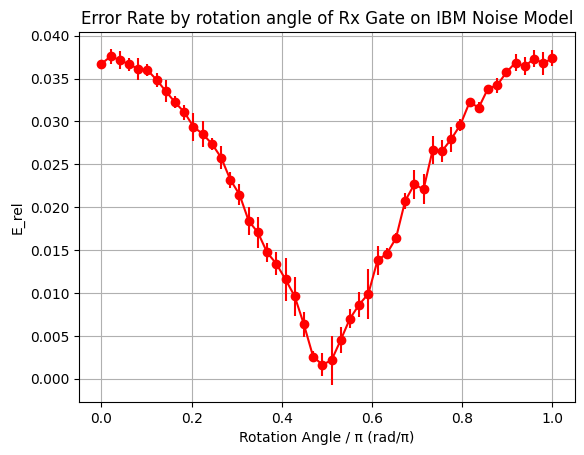

<Figure size 800x500 with 0 Axes>

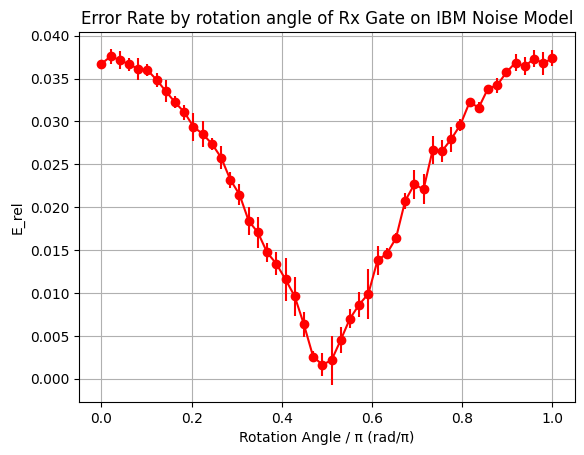

<Figure size 800x500 with 0 Axes>

In [ ]:
# 1. Load the data
data = pd.read_csv("data/2_processed/rx_investigation_results.csv")

# 2. get means, stds
rotation_angles, err_rate_means, err_rate_stds = get_angle_mean_std(data)

# 3. Plot
save_loc = "plots/rx_error_rotation_angle.png"
single_plot(rotation_angles, err_rate_means, err_rate_stds, save_loc)
# save in images so changes README automatically
save_loc = "images/rx_error_rotation_angle.png"
single_plot(rotation_angles, err_rate_means, err_rate_stds, save_loc)


## Rzz
Bit more complex because data gets loaded from IBM servers

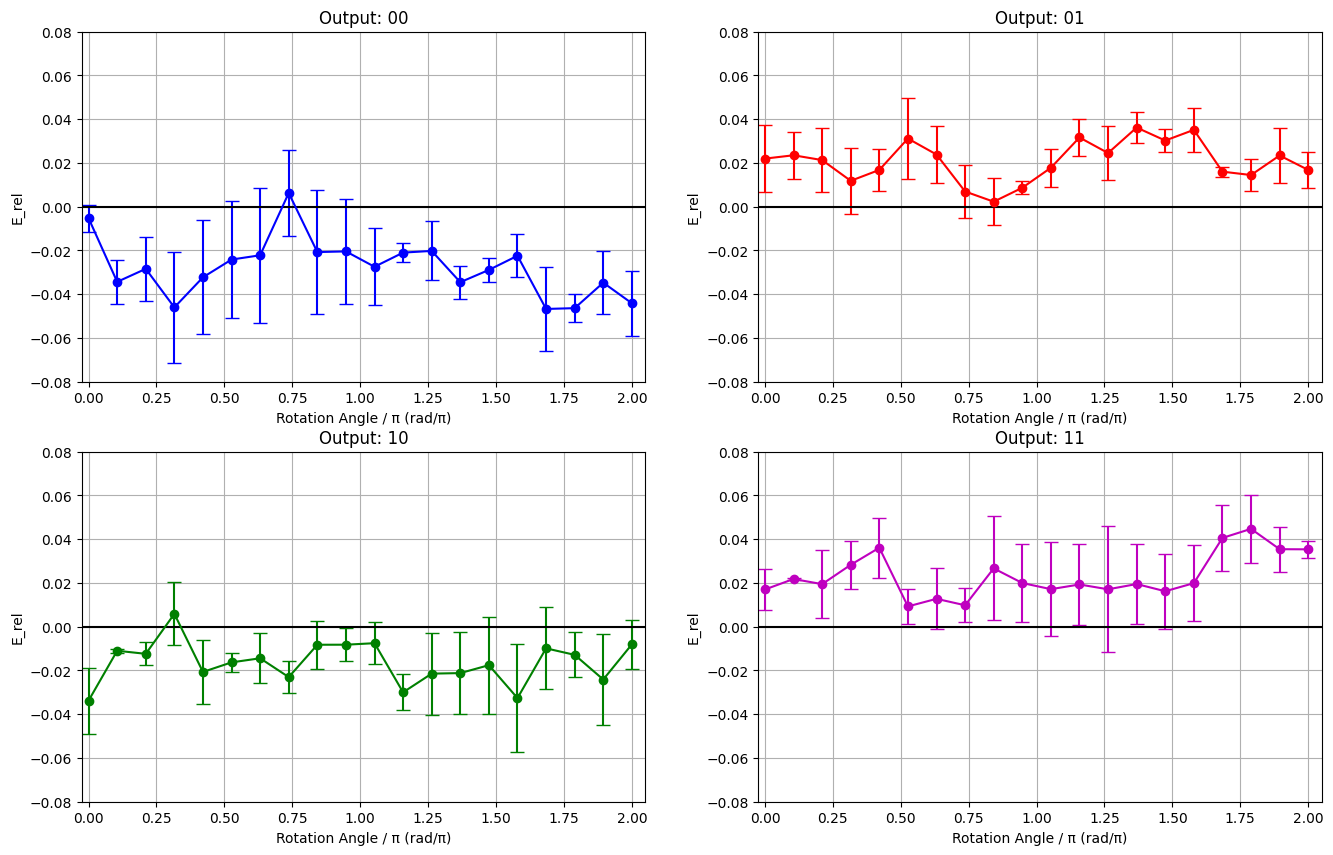

In [64]:
# 1. Load the data from IBM source
load_from_IBM = False
data_rzz_fname = "data/2_processed/rzz_investigation_results.csv"
if load_from_IBM:
    # load from IBM
    # talks to servers so can take a sec and needs internet
    data_single_job = load_single_jobs()
    data_batch_job = load_batch_jobs()
    data = pd.concat([data_single_job, data_batch_job],
                         axis=0)
    data.to_csv(data_rzz_fname)
else:
    # just load it in locally
    data = pd.read_csv(data_rzz_fname)

# 2. plot
# rzz bit less modular, plotting fn does averaging as well
multi_subplot(data, fname="plots/rzz_error_rotation_angle.png")